In [1]:
import sys
sys.path.append('C:/Users/320060820/experiments/')
import fxp_quantize
import model_data
from algorithms import fixed_bitwidth
from model_gen import inception_cnn

import keras
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# to restart layer numbering
from keras import backend as K
K.clear_session()

Using TensorFlow backend.


#### Aim: Changing the bitwidths for a fixed-bitwidth implementation on the dragonfly network

# Weights

In [5]:
save_path = 'C:/Users/320060820/experiments/test_models/'
name = 'cifar_df'
weights_path = 'cifar_df2/model_32_0.75_w.h5'

from test_models.cifar_df2 import data
_, test_data = data.get_data()

model_arch = 

model_obj = model_data.Model(name, test_data, model=model_arch.get_float_model())
float_model_acc = model_obj.evaluate_accuracy()[1]

In [6]:
accuracy_cifar = []
for i in range(2, 11):
    
    _, _, _, acc = fixed_bitwidth.evaluate_quantized_weights(model_obj, float_model_acc, i)
    
    accuracy_cifar.append(acc)

Calculating fractional offsets for weights of the network
Original network's accuracy: 0.7452
Quantized network's accuracy: 0.1038
Accuracy drop: 86.071 %
Calculating fractional offsets for the biases of the network
Quantized network's accuracy: 0.0981
Accuracy drop: 86.836 %


ValueError: too many values to unpack (expected 3)

In [ ]:
name = 'mnist_df'
model_path = 'mnist_df/inception_v3_model_batchnorm.h5'

from test_models.mnist_df import data
_, test_data = data.get_data()

model_obj = model_data.Model(name, test_data, path=save_path + model_path)
float_model_acc = model_obj.evaluate_accuracy()[1]

In [ ]:
accuracy_mnist = []
for i in range(2, 11):
    _, _, acc = fixed_bitwidth.evaluate_quantized_weights(model_obj, float_model_acc, i)
    accuracy_mnist.append(acc)

In [ ]:
name = 'svhn_df'
model_path = 'svhn_df/svhn_df.h5'

from test_models.svhn_df import data
_, test_data = data.get_data()

model_obj = model_data.Model(name, test_data, path=save_path + model_path)
float_model_acc = model_obj.evaluate_accuracy()[1]

In [ ]:
accuracy_svhn = []
for i in range(2, 11):
    _, _, acc = fixed_bitwidth.evaluate_quantized_weights(model_obj, float_model_acc, i)
    accuracy_svhn.append(acc)

In [ ]:
name = 'fashion_df'
model_path = 'fashion_df/fashion_df.h5'

from test_models.fashion_df import data
_, test_data = data.get_data()

model_obj = model_data.Model(name, test_data, path=save_path + model_path)

In [ ]:
accuracy_fashion = []
for i in range(2, 11):
    _, _, acc = fixed_bitwidth.evaluate_quantized_weights(model_obj, float_model_acc, i)
    accuracy_fashion.append(acc)

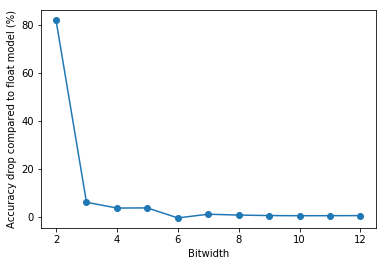

In [16]:
plt.plot(np.arange(2, 13, 1), np.array(accuracy)*100, 'o-');
plt.xlabel('Bitwidth')
plt.ylabel('Accuracy drop compared to float model (%)');

# Activations